In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib notebook

In [3]:
camera = cv2.VideoCapture(0)

def grab_frame():
    ret, frame = camera.read()
    return frame

In [4]:
import openvino
import ngraph as ng
import numpy as np
from openvino.inference_engine import IECore

In [5]:
model_xml = "face-detection-adas-0001\\FP32\\face-detection-adas-0001.xml"
model_bin = "face-detection-adas-0001\\FP32\\face-detection-adas-0001.bin"

C:\Users\mkowalski\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
ie = IECore()
net = ie.read_network(model = model_xml, weights = model_bin)
exec_net = ie.load_network(network=net, device_name="CPU")

In [7]:
nn, nc, nh, nw = net.input_info["data"].input_data.shape

<IPython.core.display.Javascript object>


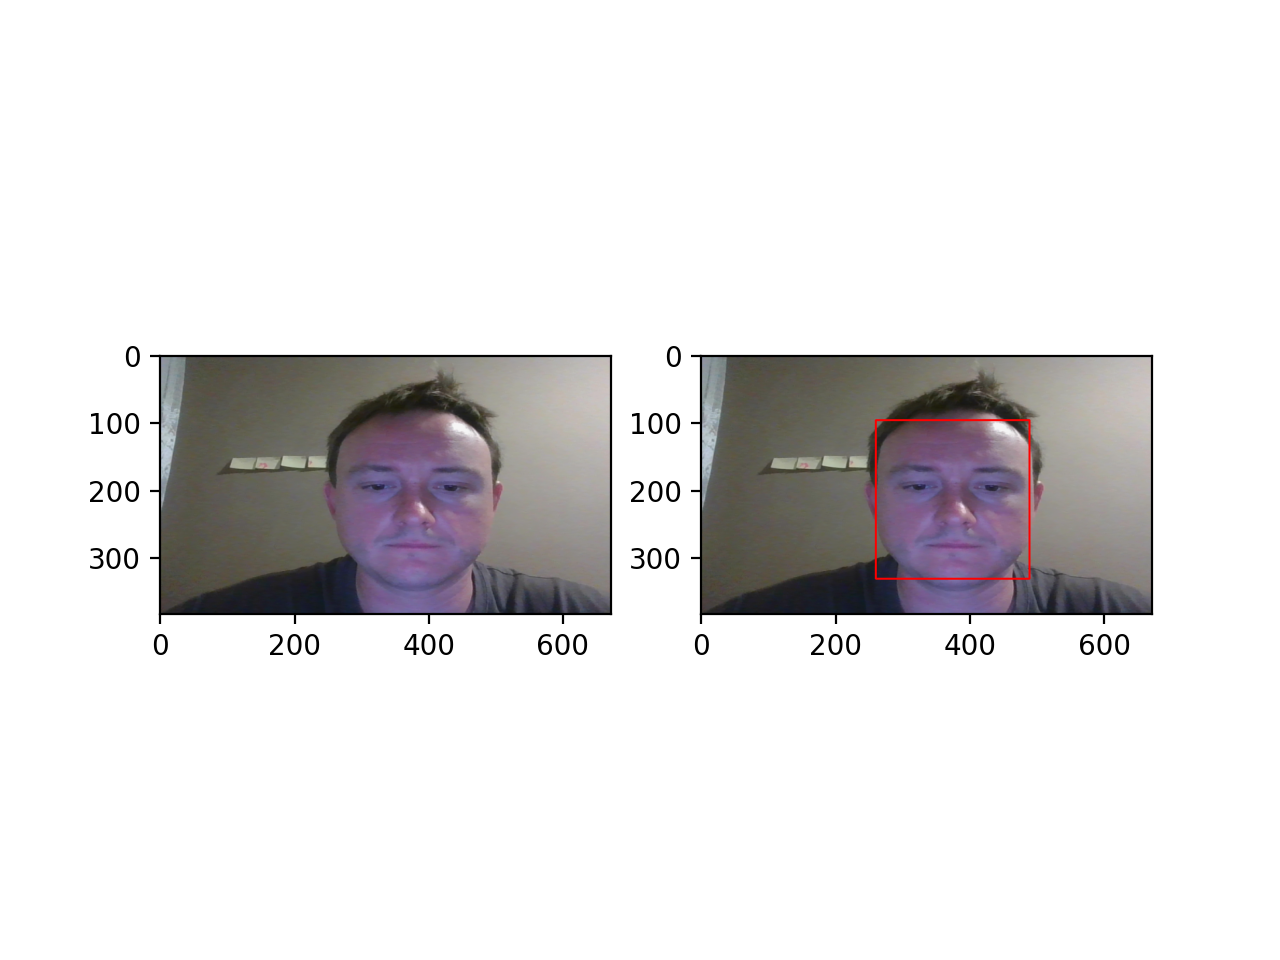

In [8]:
import logging as log

#create two subplots
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

#create two image plots
frame = cv2.resize(grab_frame(), (nw, nh))
im1 = ax1.imshow(frame)
im2 = ax2.imshow(frame)
font = cv2.FONT_HERSHEY_SIMPLEX

def update(i):
    frame = cv2.resize(grab_frame(), (nw, nh))
    
    imin = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    imout = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        
    images = np.ndarray(shape=(nn, nc, nh, nw))
    images[0] = frame.transpose((2, 0, 1))
        
    data = {}
    data["data"] = images
        
    res = exec_net.infer(inputs=data)
    
    xmin = int(res["detection_out"][0][0][0][3] * nw)
    ymin = int(res["detection_out"][0][0][0][4] * nh)
    xmax = int(res["detection_out"][0][0][0][5] * nw)
    ymax = int(res["detection_out"][0][0][0][6] * nh)
    
    cv2.rectangle(imout, (xmin, ymin), (xmax, ymax), (255,0,0), 2)

    im1.set_data(imin)
    im2.set_data(imout)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap1.release()q

ani = FuncAnimation(plt.gcf(), update, interval=50)
plt.show()